In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

Upload Data LOAN File

In [2]:
uploaded = files.upload()

Saving loan.csv to loan.csv


#### Lets have a look at the available Data

In [3]:
loan= pd.read_csv('loan.csv')
loan.head()
loan.shape

<ipython-input-3-934b0970b03d>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan= pd.read_csv('loan.csv')


(39717, 111)

##### Drop all the columns having All NaN

In [4]:
loan=loan.dropna(axis=1,how='all')

In [5]:
loan.shape

(39717, 57)

In [6]:
#### Get the mean, median, percentile of all the columns of loan
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


##### Clean Data Drop Irrelavant columns - columns having same value only

In [7]:
drop_col = []
for i in range(len(loan.columns)):
  if (loan.iloc[:,i] == loan.iloc[:,i][0]).all():
    drop_col.append(i)
loan.drop(loan.columns[drop_col],axis=1,inplace=True)

In [9]:
#### Again check the shape, columns should be dropped
loan.shape

(39717, 51)

##### Clean Data - Drop columns with customer behavior as those wont be helpful in analyzing the dataset

In [10]:
del_behavior_cols = ['id','member_id','emp_title','issue_d','url','desc','earliest_cr_line','inq_last_6mths',
                     'mths_since_last_delinq','mths_since_last_record', 'open_acc', 'pub_rec','revol_bal','revol_util','total_acc',
                     'out_prncp','out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                     'total_rec_prncp', 'total_rec_int','total_rec_late_fee','recoveries',
                     'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med',
                     'chargeoff_within_12_mths','pub_rec_bankruptcies','tax_liens','title','delinq_2yrs']
          

In [11]:
loan.drop(del_behavior_cols, axis=1, inplace=True)

In [12]:
#### Clean - Sanitize the emp_length column

In [13]:
loan['emp_length'] = loan.emp_length.apply(lambda x : str(x).replace('10+ years',"10").replace(' years','').replace('< 1 year','0').replace(' year','').replace('nan','0').strip())

In [14]:
### Verify the emp_length column state
loan.emp_length.value_counts()

10    8879
0     5658
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

#### Convert the datatype from object to int


In [15]:
loan['emp_length'] = loan['emp_length'].astype(int)

Sanitize Columns data

In [16]:
loan.int_rate = loan.int_rate.str.rstrip('%').astype(float)
loan.home_ownership = loan['home_ownership'].apply(lambda y:"OTHER" if y == "NONE" else y)

In [17]:
## PLOT Loan_status based on the DTI and see if we are getting somthing useful information

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

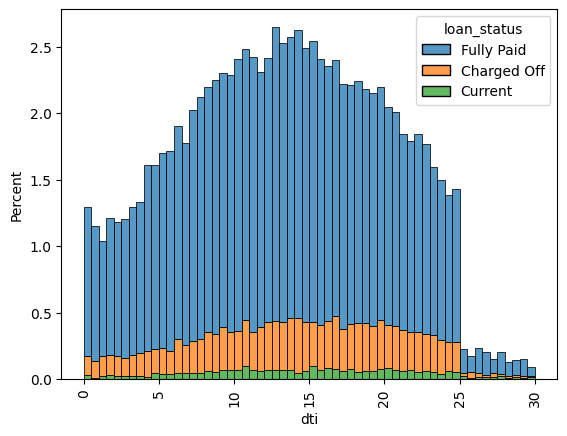

In [20]:
sns.histplot(binwidth=0.5, x="dti", hue="loan_status", data=loan, stat="percent", multiple="stack")
plt.xticks(rotation=90)

<Axes: xlabel='emp_length', ylabel='count'>

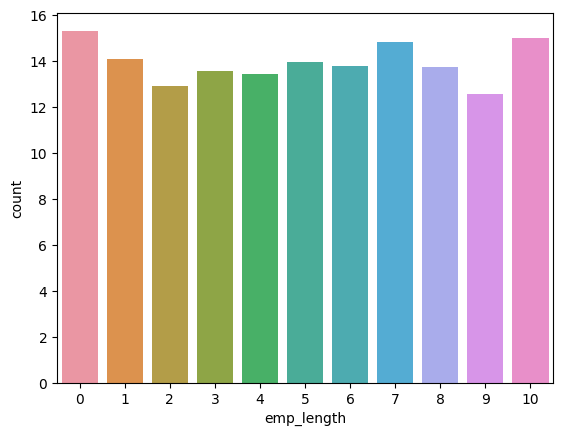

In [21]:
df = ((loan.groupby('emp_length')['loan_status'].value_counts()/loan.groupby('emp_length')['loan_status'].count())*100).reset_index(name="count")
df=df[(df['loan_status'] == 'Charged Off')]
sns.barplot(df, x='emp_length',y='count')

<Axes: xlabel='verification_status', ylabel='Defaulters'>

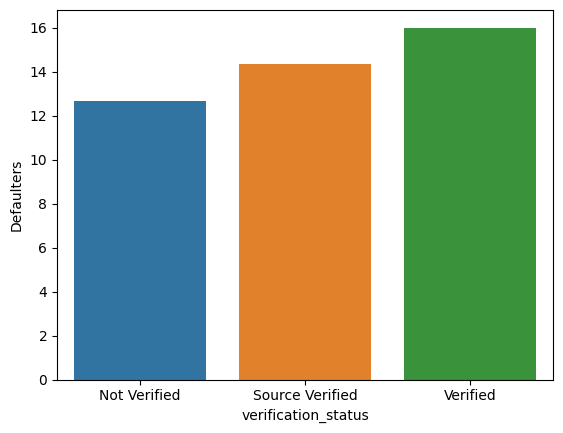

In [22]:
df_verification_status = ((loan.groupby('verification_status')['loan_status'].value_counts()/loan.groupby('verification_status')['loan_status'].count())*100).reset_index(name="Defaulters")
df_verification_status=df_verification_status[(df_verification_status['loan_status'] == 'Charged Off')]
df_verification_status.head
sns.barplot(df_verification_status, x='verification_status',y='Defaulters')

<Axes: xlabel='grade', ylabel='count'>

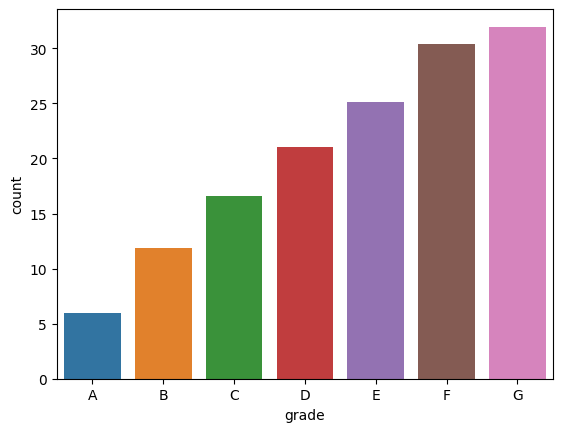

In [23]:
df_grade = ((loan.groupby('grade')['loan_status'].value_counts()/loan.groupby('grade')['loan_status'].count())*100).reset_index(name="count")
df_grade=df_grade[(df_grade['loan_status'] == 'Charged Off')]
df_grade.head
sns.barplot(df_grade, x='grade',y='count')

#### Calculate the percentage of defaulter and plot the percent of defaulters against Grade and Subgrade

<Axes: xlabel='grade', ylabel='Defaulters'>

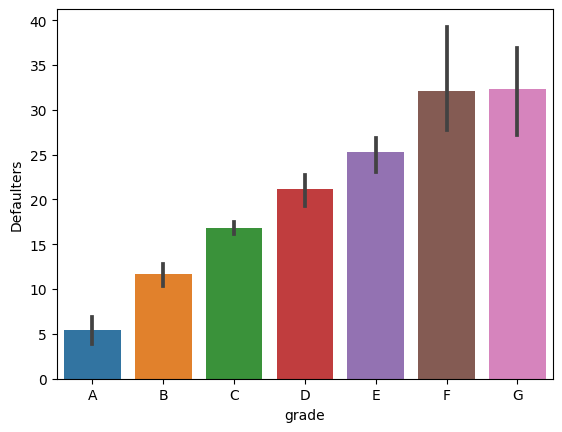

In [24]:
df_grade_sub = ((loan.groupby(['grade','sub_grade'])['loan_status'].value_counts()/loan.groupby(['grade','sub_grade'])['loan_status'].count())*100).reset_index(name="Defaulters")
df_grade_sub=df_grade_sub[(df_grade_sub['loan_status'] == 'Charged Off')]
df_grade_sub.head()
sns.barplot(df_grade_sub, x='grade',y='Defaulters')

#### Calculate the percentage of defaulter and plot the percent of defaulters against Home Ownership

<Axes: xlabel='home_ownership', ylabel='Defaulters'>

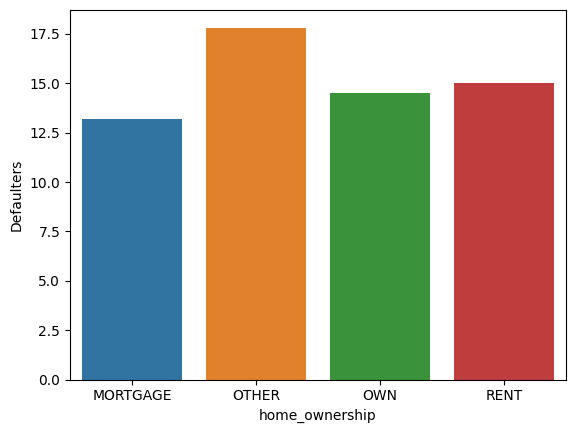

In [25]:
df_home_ownership = ((loan.groupby('home_ownership')['loan_status'].value_counts()/loan.groupby('home_ownership')['loan_status'].count())*100).reset_index(name="Defaulters")
df_home_ownership=df_home_ownership[(df_home_ownership['loan_status'] == 'Charged Off')]
df_home_ownership.head()
sns.barplot(df_home_ownership, x='home_ownership',y='Defaulters')

Calculate the percentage of defaulter and plot the percent of defaulters against Purpose

<Axes: xlabel='purpose', ylabel='Defaulters'>

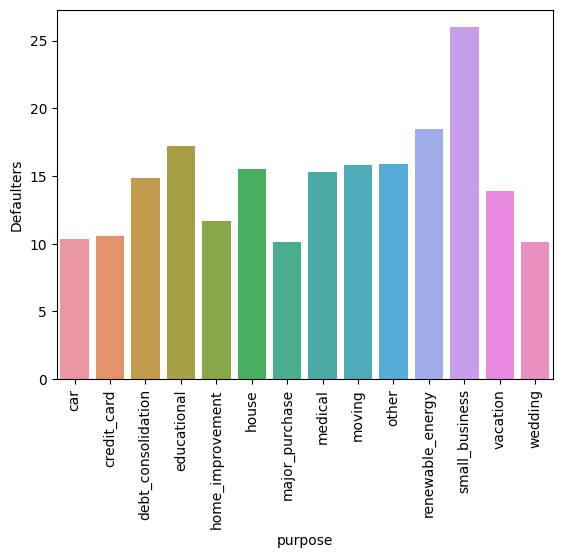

In [26]:
df_purpose = ((loan.groupby('purpose')['loan_status'].value_counts()/loan.groupby('purpose')['loan_status'].count())*100).reset_index(name="Defaulters")
plt.xticks(rotation=90)
df_purpose=df_purpose[(df_purpose['loan_status'] == 'Charged Off')]
df_purpose.head()
sns.barplot(df_purpose, x='purpose',y='Defaulters')

loan_amnt data seems to be fine as min value is 500 and there are incorrect max values

In [27]:
loan.funded_amnt_inv = loan.funded_amnt_inv.astype(int)

#### Multi Variate Heat Map on Purpose and Verification Status to analyse defaulters

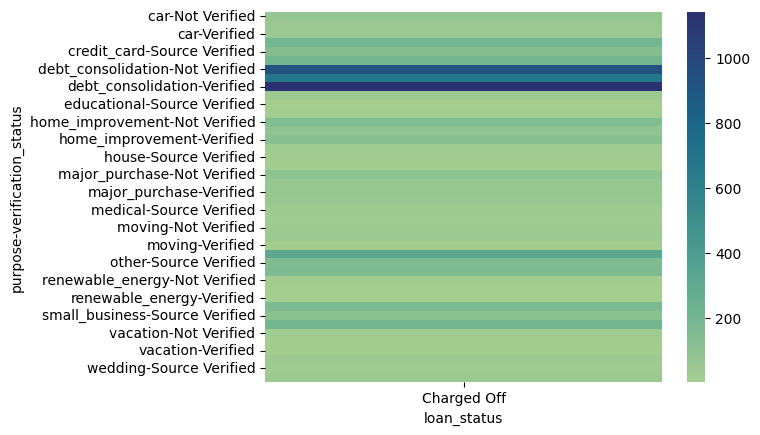

In [28]:
df3 = loan[['loan_status', 'purpose', 'verification_status']]
df3 = df3[~(df3.loan_status=='Current')]
df3 = df3[~(df3.loan_status=='Fully Paid')]

cont_table = pd.crosstab(index=[ df3['purpose'], df3['verification_status']], columns=[df3.loan_status])

# Create a heatmap plot
sns.heatmap(cont_table,cmap="crest")
plt.show()


In [29]:
##df2['annual_inc'].describe()

In [30]:


loan['bin'] = pd.qcut(loan['annual_inc'], q=20, labels=False)


loan['bin'].value_counts()

5     2758
1     2417
0     2207
10    2194
15    2174
16    2068
12    2042
9     2012
19    1974
18    1972
14    1967
4     1961
3     1955
13    1949
8     1922
11    1746
17    1741
7     1670
6     1598
2     1390
Name: bin, dtype: int64

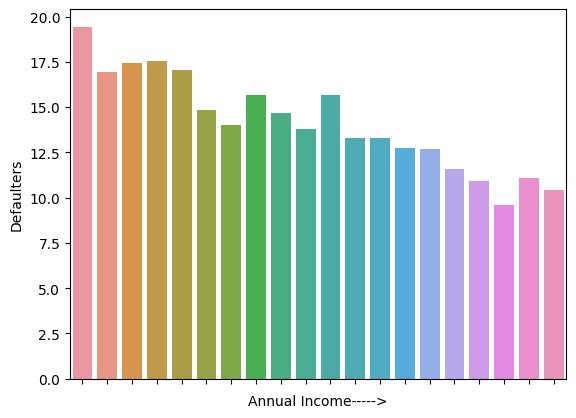

In [31]:
df_income = ((loan.groupby('bin')['loan_status'].value_counts()/loan.groupby('bin')['loan_status'].count())*100).reset_index(name="Defaulters")
plt.xticks(rotation=90)
df_income=df_income[(df_income['loan_status'] == 'Charged Off')]
df_income.head()
ax = sns.barplot(df_income, x='bin',y='Defaulters')
ax.set(xlabel='Annual Income----->', ylabel='Defaulters')
ax.set(xticklabels=[])


plt.show()